 Reference: https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [23]:
# Import Libraries
from textblob import TextBlob
import sys
import datetime
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nlkt.download('twitter')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Authentication
consumerKey = 'VapnFlTNQ8YnfkJacHJ3pA9Mq'
consumerSecret = 'csAcKfbYfO6FCwPCdvMFe5QFmNV7Z5RWsQndEcMEhfhz2UZBKd'
accessToken = '1447703825251553280-p8XMMIVHoiA0dEWSBUfsv9i9FWihi8'
accessTokenSecret = 'jlgbfYKfqtb1q6beW4TqmJ7naqvtBkuROk9cfPzoOJ1We'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [27]:
#Sentiment Analysis For Bitcoin
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'Bitcoin'
noOfTweet = 1000

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [28]:
#Number of Tweets (Total, Positive, Negative, Neutral)
btc_tweet_list = pd.DataFrame(tweet_list)
btc_neutral_list = pd.DataFrame(neutral_list)
btc_negative_list = pd.DataFrame(negative_list)
btc_positive_list = pd.DataFrame(positive_list)
print("total number: ",len(btc_tweet_list))
print("positive number: ",len(btc_positive_list))
print("negative number: ", len(btc_negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  345
negative number:  82
neutral number:  573


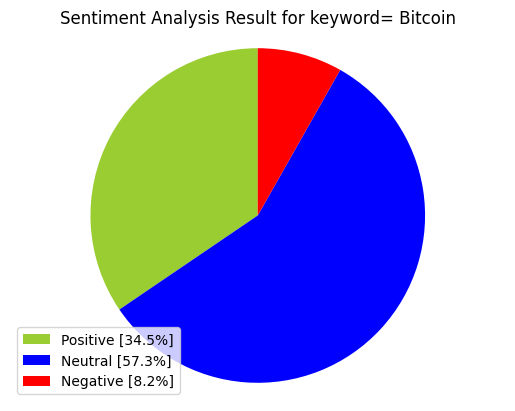

In [29]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [30]:
btc_tweet_list

,0
0,RT @BTCLegolas: and you have my bow #Bitcoin h...
1,#bitcoin bakalım kimler su akarken testisini d...
2,https://t.co/NnZKplK972
3,RT @SorunsalElliTon: #Bitcoin Yeni ATH şerefin...
4,RT @APompliano: This was me. I sold my recurri...
...,...
995,@Tamsiliette 10k bitcoin likely means a global...
996,RT @kriptoalice: #Bitcoin Yeni ATH Şerefine \n...
997,RT @saylor: #Bitcoin went public today. Satosh...
998,"Bitcoin surges above $64,000 https://t.co/ZTAX..."


In [7]:
clean_btc_tweets =  btc_tweet_list

In [8]:
clean_btc_tweets.drop_duplicates(inplace = True)

In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
btc_tw_list = pd.DataFrame(clean_btc_tweets)
btc_tw_list["text"] = btc_tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
btc_tw_list["text"] = btc_tw_list.text.map(remove_rt).map(rt)
btc_tw_list["text"] = btc_tw_list.text.str.lower()
btc_tw_list.head(10)

,0,text
0,RT @APompliano: BREAKING: $2.2 trillion asset ...,: $ . ...
1,RT @cryptoZeo: @McKinsey Kasım ayı itibariyle ...,ı ı ğ ş ...
2,RT @Bitcoin: Trying to figure out how well you...,...
3,@PeterSchiff your gold is provenly rigged pete...,.\n\n ...
4,RT @SorunsalElliTon: #Bitcoin Yeni ATH şerefin...,# ş #ç ş\n\n- ...
5,Hocam biz sizin günah keçiniz değiliz!\nValla ...,ü ç ğ !\n ...
6,"RT @fw_slick: $1,000 in #Bitcoin to one person...","$ , # ..."
7,@IOHK_Charles join us @ThePeoples_Coin to hel...,_ _ ...
8,RT @Alyattes_ALYA: Passive Income even in Pres...,! \n\n ...
9,@HazardPay5 @Bitcoin1Actual @LynAldenContact F...,", ..."


In [10]:
#Calculating Negative, Positive, Neutral and Compound values
btc_tw_list[['polarity', 'subjectivity']] = btc_tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in btc_tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    btc_tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    btc_tw_list.loc[index, 'sentiment'] = "positive"
  else:
    btc_tw_list.loc[index, 'sentiment'] = "neutral"
    btc_tw_list.loc[index, 'neg'] = neg
    btc_tw_list.loc[index, 'neu'] = neu
    btc_tw_list.loc[index, 'pos'] = pos
    btc_tw_list.loc[index, 'compound'] = comp
btc_tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @APompliano: BREAKING: $2.2 trillion asset ...,: $ . ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @cryptoZeo: @McKinsey Kasım ayı itibariyle ...,ı ı ğ ş ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @Bitcoin: Trying to figure out how well you...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,@PeterSchiff your gold is provenly rigged pete...,.\n\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @SorunsalElliTon: #Bitcoin Yeni ATH şerefin...,# ş #ç ş\n\n- ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,Hocam biz sizin günah keçiniz değiliz!\nValla ...,ü ç ğ !\n ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,"RT @fw_slick: $1,000 in #Bitcoin to one person...","$ , # ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
7,@IOHK_Charles join us @ThePeoples_Coin to hel...,_ _ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,RT @Alyattes_ALYA: Passive Income even in Pres...,! \n\n ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
9,@HazardPay5 @Bitcoin1Actual @LynAldenContact F...,", ...",0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
btc_tw_list_negative = btc_tw_list[btc_tw_list["sentiment"]=="negative"]
btc_tw_list_positive = btc_tw_list[btc_tw_list["sentiment"]=="positive"]
btc_tw_list_neutral = btc_tw_list[btc_tw_list["sentiment"]=="neutral"]

In [12]:
def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(btc_tw_list,"sentiment")

,Total,Percentage
neutral,561,99.47
positive,2,0.35
negative,1,0.18


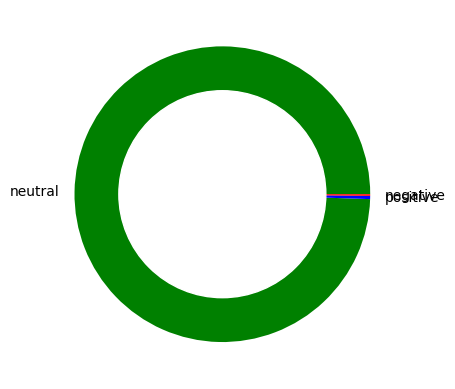

In [13]:
# create data for Pie Chart
pc = count_values_in_column(btc_tw_list,"sentiment")
names = pc.index
size = pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [31]:
#Sentiment Analysis For Ethereum
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'Ethereum'
noOfTweet = 1000
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [32]:
#Number of Tweets (Total, Positive, Negative, Neutral)
eth_tweet_list = pd.DataFrame(tweet_list)
eth_neutral_list = pd.DataFrame(neutral_list)
eth_negative_list = pd.DataFrame(negative_list)
eth_positive_list = pd.DataFrame(positive_list)
print("total number: ",len(eth_tweet_list))
print("positive number: ",len(eth_positive_list))
print("negative number: ", len(eth_negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  402
negative number:  51
neutral number:  547


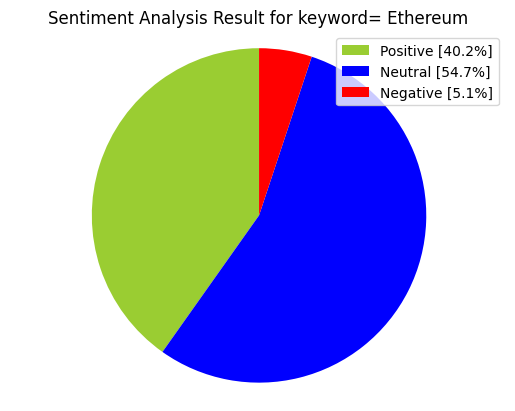

In [33]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [34]:
eth_tweet_list

,0
0,RT @kriptoalice: #Bitcoin Yeni ATH Şerefine \n...
1,RT @90BE90: 🎁 #NFTGiveaway 🎁\n\n• 1 Moustache ...
2,RT @SorunsalElliTon: #Bitcoin Yeni ATH şerefin...
3,"RT @Cointelegraph: Crypto market cap, Bitcoin,..."
4,RT @IpDaMan: $AVAK Major bullFlag‼️🚨 Load up b...
...,...
995,RT @JamesDeanNFT: 🎃#NFTgiveaway🎃\n\nWin a NFT ...
996,RT @JamesDeanNFT: 🎃#NFTgiveaway🎃\n\n3x NFT giv...
997,RT @Alyattes_ALYA: Passive Income even in Pres...
998,RT @DigitalArmsNFT: Whitelisting is open now a...


In [35]:
#Sentiment Analysis For Litecoin
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'Litecoin'
noOfTweet = 1000
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [36]:
#Number of Tweets (Total, Positive, Negative, Neutral)
ltc_tweet_list = pd.DataFrame(tweet_list)
ltc_neutral_list = pd.DataFrame(neutral_list)
ltc_negative_list = pd.DataFrame(negative_list)
ltc_positive_list = pd.DataFrame(positive_list)
print("total number: ",len(ltc_tweet_list))
print("positive number: ",len(ltc_positive_list))
print("negative number: ", len(ltc_negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  232
negative number:  48
neutral number:  720


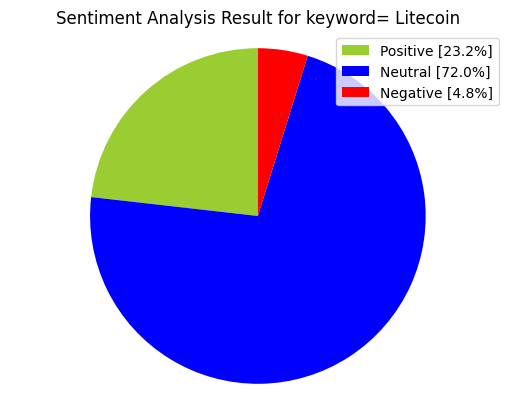

In [37]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [38]:
ltc_tweet_list

,0
0,RT @dorsa___noble: Kazananlar asla pes etmeyec...
1,RT @CryptoEugene101: $QNT\n\n🚨CRITICALLY LOW C...
2,$LTC/USD - buy on:@bwword - sell on:@bithumbof...
3,Ahora en la plataforma de @sellatuparley puede...
4,@MillaLiraj @litecoin @flashtrader1 @LTC_Conce...
...,...
995,RT @CryptoBucksApp: BREAKING NEWS: CryptoBucks...
996,"RT @Rain_Turkiye: Dilediğiniz yerden, kolay ve..."
997,RT @CryptoZoroo: We believe in ourselfs and in...
998,@qamzeedmr @VenusProtocol #AinuToken @TokenAin...


In [39]:
#Sentiment Analysis For Dogecoin
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'Dogecoin'
noOfTweet = 1000
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [40]:
#Number of Tweets (Total, Positive, Negative, Neutral)
doge_tweet_list = pd.DataFrame(tweet_list)
doge_neutral_list = pd.DataFrame(neutral_list)
doge_negative_list = pd.DataFrame(negative_list)
doge_positive_list = pd.DataFrame(positive_list)
print("total number: ",len(doge_tweet_list))
print("positive number: ",len(doge_positive_list))
print("negative number: ", len(doge_negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  233
negative number:  63
neutral number:  704


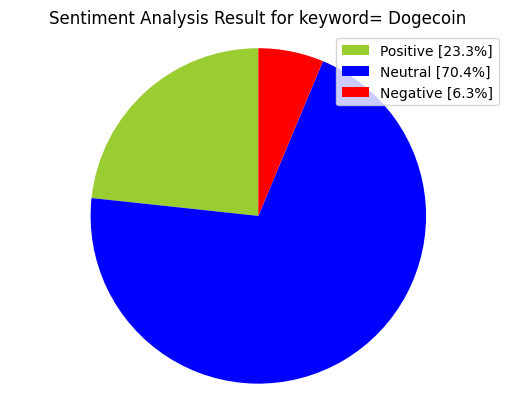

In [41]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [42]:
doge_tweet_list

,0
0,"$DOGE to 1$ , $DOGE is worth:$0.25 \n24h volum..."
1,"RT @CoinDesk: ""I don't bet against funny meme ..."
2,RT @MikeDavisYT: #DOGECOIN 361% breakout move ...
3,RT @MinisterOfDoge: #Bitcoin new all time high...
4,#Bitcoin boom……🚀🚀 🌕 100K\n👀👀 when #Elonmusk #...
...,...
995,@RnoHach @DogeMau420 @DogeCoinMilitia @CaliShi...
996,RT @ProTheDoge: Ima just leave this here. #dog...
997,RT @golden991: It is funny. 😆 Years from now -...
998,Dogecoin on Coinbase.\nCoinbase will offer cus...
